In [36]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier, Lasso,RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, KFold
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, RocCurveDisplay, mean_squared_log_error,  accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, RobustScaler, StandardScaler, FunctionTransformer, LabelEncoder, OneHotEncoder, Binarizer, OrdinalEncoder, MaxAbsScaler
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel, RFE, RFECV 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor, ExtraTreesRegressor, VotingClassifier, VotingRegressor,StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# from pycaret.regression import *
import xgboost
from os import stat
import numpy as np
import pandas as pd 
from contextlib import closing
from urllib.request import urlopen
import json
from datetime import datetime 
import lightgbm


import warnings
warnings.filterwarnings('ignore')


Kaggle : 

https://www.kaggle.com/c/bike-sharing-demand/data

In [37]:
# Fonctions run_df avec pandas

# # Data pour Lille à voir si utilisable  
# # https://opendata.lillemetropole.fr/explore/dataset/vlille-realtime/table/

# # Skip logs about pandas caveats documentations 
# pd.options.mode.chained_assignment = None  # default='warn'



# # Pipeline pour la prédiction personnalisée : 

# def run_df_dc_personalised(df, date, time, weather, temp, temp_feel, humidity, windspeed):
    
#     # Day of year 
#     # print(time[0:2])
    
#     df.iloc[0:1,3]= str(weather)
#     df.iloc[0:1,4] = int(temp)
#     df.iloc[0:1,5]= int(temp_feel)
#     df.iloc[0:1,6] = int(humidity)
#     df.iloc[0:1,7]= int(windspeed)
#     df.iloc[0:1,8]=  pd.to_datetime(str(date)).dayofyear   
#     time = str(time) 
#     df.iloc[0:1,9] = int(time[0:2])
    
#     make_season_holiday_dc(df)
    
#     return df



# # Pipeline pour la prediction automatique pour Washington DC : 
# def run_df_dc():
        
#     df_app = make_df_init(index=40)
#     stat_api_3h(df_app, lat='38.8951', lon='77.0364')  
#     make_season_holiday_dc(df_app)
#     converstion_fr_dc(df_app)
#     return df_app


# # Pipeline pour la prediction automatique pour Lille : 

# def run_df_lille():
    
#     # Prendre la 1ere lignes du datafram pour le jour d'aujourd'hui
#     df_app = make_df_init(index=40)
#     stat_api_3h(df_app, lat='50.62925', lon='3.057256')
#     make_season_holiday_fr(df_app)
#     return df_app


# def run_df_meteo_1h_lille():
    
#     # Prendre la 1ere lignes du datafram pour le jour d'aujourd'hui
#     df_app = make_df_init(48)
#     stat_api_1h(df_app, lat='50.62925', lon='3.057256')
#     add_day_hour_from_nom(df_app)
#     make_season_holiday_fr(df_app)
#     return df_app


# def run_df_meteo_1h_dc():
    
#     # Prendre la 1ere lignes du datafram pour le jour d'aujourd'hui
#     df_app = make_df_init(48)
#     stat_api_1h(df_app, lat='38.8951', lon='77.0364')   
#     add_day_hour_from_nom(df_app)
#     make_season_holiday_fr(df_app)
#     converstion_fr_dc(df_app)
#     return df_app




In [38]:
# # Pipelines fonctions avec pandas 


# # J'importe et je modifie le df de train pour en faire le df de prédiction de base avec les colonnes dans le bonnes ordres. 
# def make_df_init(index):
#     df = pd.read_csv('./data/train.csv')
#     df.drop('Unnamed: 0', axis=1, inplace = True)
#     df.drop('datetime', axis=1, inplace=True)
#     df.drop(columns=['registered', 'casual'], index=1, inplace=True)
#     df = pd.DataFrame(columns=df.drop('count', axis=1).keys(), index=np.arange(0,index,1))
   
#     return df 

# def stat_api_3h(df, lat, lon):
#     date = []
#     temp = []
#     atemp = []
#     humidity = []
#     windspeed = []
#     weather = []
#     with closing(urlopen(f'http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid=6bda77c15824913b0353424425dfeb64')) as f:
#         cityEph = json.loads(f.read())
#         for i in range(0, len(cityEph['list'])):
#             temp.append(cityEph['list'][i]['main']['temp'])
#             atemp.append(cityEph['list'][i]['main']['feels_like'])
#             humidity.append(cityEph['list'][i]['main']['humidity'])
#             windspeed.append(cityEph['list'][i]['wind']['speed'])
#             weather.append(cityEph['list'][i]['weather'][0]['main'])
#             date.append(cityEph['list'][i]['dt_txt'])
            
#     df['day'] = [ i for i in date]
#     df['hour']  = pd.to_datetime(df['day']).dt.hour
#     df['day']  = pd.to_datetime(df['day']).dt.dayofyear
#     df['temp'] = [ i for i in temp]
#     df['atemp'] = [ i for i in atemp]
#     df['humidity'] = [ i for i in humidity]
#     df['windspeed'] = [ i for i in windspeed]
#     df['weather'] = [ str(i) for i in weather]
#     df['temp'] = df['temp'] - 273.15
#     df['atemp'] = df['atemp'] - 273.15
    
    
# def stat_api_1h(df, lat, lon):
#     date = []
#     temp = []
#     atemp = []
#     humidity = []
#     windspeed = []
#     weather = []
#     with closing(urlopen(f'https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude=minutely&appid=6bda77c15824913b0353424425dfeb64')) as f:
#         cityEph = json.loads(f.read())    
#         for i in range(0, len(cityEph['hourly'])): 

#             temp.append(cityEph['hourly'][i]['temp'])
#             atemp.append(cityEph['hourly'][i]['feels_like'])
#             humidity.append(cityEph['hourly'][i]['humidity'])
#             windspeed.append(cityEph['hourly'][i]['wind_speed'])
#             weather.append(cityEph['hourly'][i]['weather'][0]['main'])
#             date.append(cityEph['hourly'][i]['dt'])
            
#                                 # hourly : 48h de data par heure  ; 
#                                 # current : actuel 
#                                 # daily : 8j 
    
    
#     df['temp'] = [ i for i in temp]
#     df['atemp'] = [ i for i in atemp]
#     df['humidity'] = [ i for i in humidity]
#     df['windspeed'] = [ i for i in windspeed]
#     df['weather'] = [ str(i) for i in weather]
#     df['temp'] = df['temp'] - 273.15
#     df['atemp'] = df['atemp'] - 273.15
    
    
    
    
# def make_season_holiday_dc(df):

#     # Season 
#     df['season'][(df['day'] >= 78 ) & (df['day'] < 141 )] = 1
#     df['season'][(df['day'] >= 141) & (df['day'] < 365 ) ] = 2
#     df['season'][(df['day'] >= 365) & (df['day'] < 356 ) ] = 3
#     df['season'][(df['day'] >= 356) | (df['day'] < 78 ) ] = 4

#     # Holliday For Washington 
#     df['holiday'] = 0 
#     df['holiday'][(df['day'] >= 357) | (df['day'] <= 2 ) ] = 1
#     df['holiday'][(df['day'] >= 52) & (df['day'] <= 56 ) ] = 1
#     df['holiday'][(df['day'] >= 69) & (df['day'] <= 70 ) ] = 1
#     df['holiday'][(df['day'] >= 101) & (df['day'] <= 108 ) ] = 1
#     df['holiday'][(df['day'] >= 185) & (df['day'] <= 240 ) ] = 1
#     df['holiday'][(df['day'] >= 279) & (df['day'] <= 283 ) ] = 1
#     df['holiday'][(df['day'] >= 315) & (df['day'] <= 329 ) ] = 1

#     # Férié for Washington 
#     df['holiday'][df['day'] == 17 ] = 1
#     df['holiday'][df['day'] == 26 ] = 1
#     df['holiday'][df['day'] == 150 ] = 1
#     df['holiday'][df['day'] == 129 ] = 1
#     df['holiday'][df['day'] == 305 ] = 1
#     df['holiday'][df['day'] == 308 ] = 1
        
#     df['workingday'] = 0
#     for i in np.arange(1,365,7):
#         df['workingday'][(df['day'] == i) | (df['day'] == i + 1) ] = 1
        
            
#     df.rename(columns = {'weather' : 'weather2'}, inplace = True)
#     df.insert(4, 'weather', 0)
    
#     df['weather'][df['weather2'].str.lower().isin([weather_choice_1_from_api, weather_choice_1_from_page.lower()])] = 1
#     df['weather'][df['weather2'].str.lower().isin([weather_choice_2_from_api, weather_choice_2_from_page.lower()])] = 2
#     df['weather'][df['weather2'].str.lower().isin([weather_choice_3_from_api, weather_choice_3_from_page.lower()])] = 3
#     df['weather'][df['weather2'].str.lower().isin([weather_choice_4_from_api, weather_choice_4_from_page.lower()])] = 4
#     df.drop('weather2', axis=1, inplace=True)
    
#     df['weather'] = df['weather'].astype(int)
#     df['season'] = df['season'].astype(int)

    
    
# def make_season_holiday_fr(df):

#     # just need columns day to run this functions and 

#     # Season 
#     df['season'][(df['day'] >= 78 ) & (df['day'] < 141 )] = 1
#     df['season'][(df['day'] >= 141) & (df['day'] < 365 ) ] = 2
#     df['season'][(df['day'] >= 365) & (df['day'] < 356 ) ] = 3
#     df['season'][(df['day'] >= 356) | (df['day'] < 78 ) ] = 4


#     # Holliday France - Lille
#     df['holiday'] = 0 
#     df['holiday'][(df['day'] >= 352) | (df['day'] < 3 ) ] = 1
#     df['holiday'][(df['day'] >= 36) & (df['day'] < 52 ) ] = 1
#     df['holiday'][(df['day'] >= 99) & (df['day'] < 115 ) ] = 1
#     df['holiday'][(df['day'] >= 145) & (df['day'] < 150 ) ] = 1
#     df['holiday'][(df['day'] >= 188) & (df['day'] < 244 ) ] = 1
#     df['holiday'][(df['day'] >= 296) & (df['day'] < 312 ) ] = 1

#     # Férié 
#     df['holiday'][df['day'] == 17 ] = 1
#     df['holiday'][df['day'] == 26 ] = 1
#     df['holiday'][df['day'] == 150 ] = 1
#     df['holiday'][df['day'] == 129 ] = 1
#     df['holiday'][df['day'] == 305 ] = 1
#     df['holiday'][df['day'] == 308 ] = 1

#     df['workingday'] = 0
#     for i in np.arange(1,365,7):
#         df['workingday'][(df['day'] == i) | (df['day'] == i + 1) ] = 1
        
        
#     df.rename(columns = {'weather' : 'weather2'}, inplace = True)
#     df.insert(4, 'weather', 0)
        
#     df['weather'][df['weather2'].str.lower().isin([weather_choice_1_from_api, weather_choice_1_from_page.lower()])] = 1
#     df['weather'][df['weather2'].str.lower().isin([weather_choice_2_from_api, weather_choice_2_from_page.lower()])] = 2
#     df['weather'][df['weather2'].str.lower().isin([weather_choice_3_from_api, weather_choice_3_from_page.lower()])] = 3
#     df['weather'][df['weather2'].str.lower().isin([weather_choice_4_from_api, weather_choice_4_from_page.lower()])] = 4
#     df.drop('weather2', axis=1, inplace=True)
    
#     df['weather'] = df['weather'].astype(int)
#     df['season'] = df['season'].astype(int)
    
    
# def add_day_hour_from_nom(df):

#     day = datetime.now()
#     df['day'] = day                          
#     df['hour']  = pd.to_datetime(df['day']).dt.hour
#     df['day']  = pd.to_datetime(df['day']).dt.dayofyear
    
#     for i in range(0, len(df['hour'])):
        
#         df.iloc[i,9] += i 
#         if df.iloc[i,9] >= 24 :
#             df.iloc[i,9] -= 24
#             df.iloc[i,8] += 1
#         else:
#             df.iloc[i,9] += 1 
    
#     return df

    
    
#     # Decalage horaire : -5h 
# def converstion_fr_dc(df):
    
#         for i in range(0, len(df['hour'])):
        
#             if df.iloc[i,9] <= 4 :
#                 df.iloc[i,9] += 19
#             else:
#                 df.iloc[i,9] -= 5
        

    
    
# # faire graph count vélo par jour des 20 jours précédents la requêtes + 10 des jours suivants 

In [39]:
# import pickle
# filename = 'model_all.sav'
# pickle.dump(model, open(filename, 'wb'))

In [40]:
# To save the model with pickle file 
# save_model(best,'lightgbm-location-velo')
# Tuned_rf = tune_model(rf) 
# Tuned_rf

In [41]:
# pd.to_datetime('2011-10-30').dayofyear

In [42]:
# #Add new ROW
# df=df.append({'Name' : 'Apple' , 'Price' : 23, 'Stock' : 'No'} , ignore_index=True)

In [43]:
a = 1.568956
round(a, 2)

1.57

In [44]:
def transform_weather(x):
    if x == 1:
        x = 4
    elif x == 2:
        x = 3
    elif x == 3:
        x = 2 
    elif x == 4:
        x = 1
        
    return x 

In [45]:
def transform_season(x):
    if x == 1:
        x = 3
    elif x == 2:
        x = 4
    elif x == 3:
        x = 2 
    elif x == 4:
        x = 1
        
    return x 

![image](data.png)

In [46]:
train_data_all =  pd.read_csv('../data/train.csv')
train_data_all.drop('Unnamed: 0', axis=1, inplace=True)

train_data_all = train_data_all.append({'datetime' : '2011-08-17 08:00:00', 'season' : 0, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : 75, 'atemp' : 72, 'humidity' : 2, 'windspeed' : 500, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2012-07-15 09:00:00', 'season' : 0, 'holiday' : 0, 'workingday' : 0, 'weather' : 1, 'temp' : 96, 'atemp' : 88, 'humidity' : 2, 'windspeed' : 500.0, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-08-10 11:00:00', 'season' : 1, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : 200, 'atemp' : 155, 'humidity' : 51, 'windspeed' : 0, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-08-12 19:00:00', 'season' : 2, 'holiday' : 0, 'workingday' : 0, 'weather' : 3, 'temp' : 111, 'atemp' : 110, 'humidity' : 4, 'windspeed' : 225, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-12-08 18:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -48, 'atemp' : -55, 'humidity' : 9, 'windspeed' : 110, 'casual' : 0, 'registered' : 0,  'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-12-24 17:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -110, 'atemp' : -108, 'humidity' : 25, 'windspeed' : 110, 'casual' : 0, 'registered' : 0,  'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-11-25 16:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -48, 'atemp' : -55, 'humidity' : 69, 'windspeed' : 110, 'casual' : 0, 'registered' : 0,  'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-12-27 15:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 1, 'temp' : -500, 'atemp' : -55, 'humidity' : 0, 'windspeed' : 110, 'casual' : 0, 'registered' : 0,  'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-07-21 15:00:00', 'season' : 0, 'holiday' : 0, 'workingday' : 0, 'weather' : 2, 'temp' : 75, 'atemp' : 72.5, 'humidity' : 41, 'windspeed' : 500, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-06-04 13:00:00', 'season' : 1, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : 200, 'atemp' : 155, 'humidity' : 55, 'windspeed' : 0, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-06-05 14:00:00', 'season' : 2, 'holiday' : 0, 'workingday' : 0, 'weather' : 3, 'temp' : 111, 'atemp' : 110, 'humidity' : 25, 'windspeed' : 225, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-11-28 15:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -48, 'atemp' : -55, 'humidity' : 39, 'windspeed' : 110, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-12-27 09:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 3, 'temp' : -110, 'atemp' : -108, 'humidity' : 10, 'windspeed' : 110, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2011-11-27 12:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -48, 'atemp' : -55, 'humidity' : 57, 'windspeed' : 110, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)
train_data_all = train_data_all.append({'datetime' : '2012-01-02 16:00:00', 'season' : 4, 'holiday' : 0, 'workingday' : 0, 'weather' : 4, 'temp' : -500, 'atemp' : -55, 'humidity' : 84, 'windspeed' : 110, 'casual' : 0, 'registered' : 0, 'count' : 0}, ignore_index = True)

train_data_all['day'] = pd.to_datetime(train_data_all['datetime']).dt.dayofyear
train_data_all['hour'] = pd.to_datetime(train_data_all['datetime']).dt.hour
train_data_all['year'] = pd.to_datetime(train_data_all['datetime']).dt.year

train_data_all.drop(['datetime'], axis=1, inplace=True)


for i in range(0, len(train_data_all.iloc[:,0])) :
    train_data_all.iloc[i,0] = transform_season(int(train_data_all.iloc[i,0] ))
    
for i in range(0, len(train_data_all.iloc[:,3])) :
    train_data_all.iloc[i,3] = transform_weather(int(train_data_all.iloc[i,3] ))


train_data_all = train_data_all.drop(['registered','casual'], axis=1)



augmentation = np.linspace(0, (144 * 100 / 230) *  train_data_all.shape[0] , train_data_all.shape[0])

# train_data_all['augmentation'] = 0 
# train_data_all['augmentation'] = augmentation # Etape suivante : Il faut order par day avant de drop datetime pour que ce soit cohérent 




train_data_all_X = train_data_all.drop('count', axis = 1)
train_data_all_y = train_data_all['count']




test_data_all =  pd.read_csv('../data/test.csv')
test_data_all.drop('Unnamed: 0', axis=1, inplace=True)
test_data_all['day'] = pd.to_datetime(test_data_all['datetime']).dt.dayofyear
test_data_all['hour'] = pd.to_datetime(test_data_all['datetime']).dt.hour
test_data_all['year'] = pd.to_datetime(test_data_all['datetime']).dt.year
test_data_all.drop(['datetime'], axis=1, inplace=True)

for i in range(0, len(test_data_all.iloc[:,0])) :
    test_data_all.iloc[i,0] = transform_season(int(test_data_all.iloc[i,0] ))
    
for i in range(0, len(test_data_all.iloc[:,3])) :
    test_data_all.iloc[i,3] = transform_weather(int(test_data_all.iloc[i,3] ))

# augmentation = np.linspace(0, (144 * 100 / 230) *  test_data_all.shape[0] / 100 , test_data_all.shape[0])
# test_data_all['augmentation'] = augmentation


test_data_all = test_data_all.drop(['registered','casual'], axis=1)

test_data_all_X = test_data_all.drop('count', axis = 1)
test_data_all_y = test_data_all['count']


In [313]:
import json 
data = train_data_all.iloc[0,:].to_json()
data = json.dumps(data)
eval(data)

'{"season":3.0,"holiday":0.0,"workingday":0.0,"weather":4.0,"temp":9.84,"atemp":14.395,"humidity":81.0,"windspeed":0.0,"count":16.0,"day":1.0,"hour":0.0,"year":2011.0}'

In [314]:
# import urllib.parse
# import urllib.request



# test_post = urllib.parse.urlencode({"season": 3.0 ,"holiday":0.0,"workingday":0.0,"weather":4.0,"temp":9.84,"atemp":14.395,"humidity":81.0,"windspeed":0.0,"count":16.0,"day":1.0,"hour":0.0,"year":2011.0})



# url = 'http://127.0.0.1:8000/predict/xgboost/'


# with urllib.request.urlopen(url, eval(test_post)) as f:
#     print(f.read().decode('utf-8'))

In [315]:
# # ---------------------------------------------------------------- Casual and registered   
# # ---------------------------------------------------------------- Train set => 
# data_train =  pd.read_csv('../data/train.csv')
# data_train.drop('Unnamed: 0', axis=1, inplace=True)
# data_train['day'] = pd.to_datetime(data_train['datetime']).dt.dayofyear
# data_train['hour'] = pd.to_datetime(data_train['datetime']).dt.hour
# data_train['year'] = pd.to_datetime(data_train['datetime']).dt.year
# data_train.drop(['datetime','count'], axis=1, inplace=True)

# for i in range(0, len(data_train.iloc[:,0])) :
#     data_train.iloc[i,0] = transform_season(int(data_train.iloc[i,0] ))


# casual_train = data_train.drop('registered', axis=1)
# registered_train = data_train.drop('casual', axis=1)

# casual_train_X = casual_train.drop('casual', axis = 1)
# casual_train_y = casual_train['casual']
# registered_train_X = registered_train.drop('registered', axis=1)
# registered_train_y = registered_train['registered']



# # ---------------------------------------------------------------- Test set => 

# data_test =  pd.read_csv('../data/test.csv')
# data_test.drop('Unnamed: 0', axis=1, inplace=True)
# data_test['day'] = pd.to_datetime(data_test['datetime']).dt.dayofyear
# data_test['hour'] = pd.to_datetime(data_test['datetime']).dt.hour
# data_test['year'] = pd.to_datetime(data_test['datetime']).dt.year
# data_test.drop(['datetime','count'], axis=1, inplace=True)

# for i in range(0, len(data_test.iloc[:,0])) :
#     data_test.iloc[i,0] = transform_season(int(data_test.iloc[i,0] ))


# casual_test = data_test.drop('registered', axis=1)
# registered_test = data_test.drop('casual', axis=1)

# casual_test_X = casual_test.drop('casual', axis = 1)
# casual_test_y = casual_test['casual']
# registered_test_X = registered_test.drop('registered', axis=1)
# registered_test_y = registered_test['registered']
# casual_test_X

In [316]:
# Faire catégories : Temps dangereux : 0 ou 1
# Ajouter des lignes > 60° comme étant dangereux idem < à -50 
# Ajouter les lignes associés aux conditions métérologiques extremes encodé par la colonne temps dangereux avec 0 count. 

# Faire un booléens : journée idéale : Entre 23 et 35 + windspeed entre 3 et 20 

In [317]:
# # Meilleur model xgb : 
# # Preprocessing et model xgboost :0.8949094854204845(8s)

# logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

# numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
# encode_column = ['season','workingday','weather','holiday','hour','year']

# numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
# encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

# preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

# xgb = xgboost.XGBRegressor(booster='gbtree', colsample_bytree = 0.493659, eta = 0.3, gamma=0,max_depth = 6, max_leaves=0, n_estimators =100, objective='reg:linear', random_state=32, reg_alpha=1.6666666666666667, reg_lambda =1.9791666666666667, subsample_freq=0.75, tree_method='auto')
# model_xgboost = make_pipeline(preprocessor,  xgb)
# model_xgboost.fit(train_data_all_X , train_data_all_y)
# model_xgboost.score(test_data_all_X, test_data_all_y)

In [98]:
# Meilleur model : 
# Preprocessing et model xgboost :0.9056841627368329(8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

xgb = xgboost.XGBRegressor(booster='gbtree', colsample_bytree = 0.493659, eta = 0.28, gamma=0,max_depth = 7, max_leaves=0, n_estimators =100, objective='reg:squarederror', random_state=32, reg_alpha=1.6666666666666667, reg_lambda =1.9791666666666667, subsample_freq=0.75, tree_method='auto')
model_xgboost = make_pipeline(preprocessor,  xgb)
model_xgboost.fit(train_data_all_X , train_data_all_y)
print('train data', model_xgboost.score(train_data_all_X, train_data_all_y))
print('test data', model_xgboost.score(test_data_all_X, test_data_all_y))

[14:50:56] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


train data 0.9866919813942476
test data 0.9056841627368329


In [28]:
# import pickle
# filename = 'xgboost.pkl'
# pickle.dump(model_xgboost, open(filename, 'wb'))

In [14]:
# import pickle 
# savedmodel = open('./lgbm.pkl', 'rb')
# model = pickle.load(savedmodel)
# savedmodel.close()

In [49]:
np.log1p(-10)

nan

In [99]:
# Preprocessing et model lgbm : 0.9190960274167893 (8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(missing_values=np.nan), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))


model_lgbm =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7395, learning_rate=0.12, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)
model_lgbm_fit = make_pipeline(preprocessor, model_lgbm)
model_lgbm_fit.fit(train_data_all_X , train_data_all_y)
print(model_lgbm_fit.score(train_data_all_X, train_data_all_y))
print(model_lgbm_fit.score(test_data_all_X, test_data_all_y))

0.9614442590972704
0.9190960274167893


In [79]:
# Preprocessing et model lgbm : 0.9190960274167893 (8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline(  SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))


model_lgbm =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7385, learning_rate=0.07, max_bin=725, max_depth=8, reg_lambda=0.68596,reg_alpha=0, subsample_freq=56)
model_lgbm_fit = make_pipeline(preprocessor, model_lgbm)
model_lgbm_fit.fit(train_data_all_X , train_data_all_y)
model_lgbm_fit.score(test_data_all_X, test_data_all_y)

0.9051328597939277

In [30]:
# import pickle
# filename = 'lgbm.pkl'
# pickle.dump(model_lgbm_fit, open(filename, 'wb'))

In [16]:
# Meilleur model n2 lgbm : 
# Preprocessing et model lgbm :0.9118832634446215 (8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

lgbm_2 = lightgbm.LGBMRegressor(random_state=2, min_data_in_leaf=100, max_bin=1023, reg_alpha=0, subsample_freq=56)
model_lgbm_2 = make_pipeline(preprocessor,  lgbm_2)
model_lgbm_2.fit(train_data_all_X , train_data_all_y)
model_lgbm_2.score(test_data_all_X, test_data_all_y)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


0.9118832634446215

In [17]:
# colsample_bytree => Pourcentage de features utilisé pour chaque arbre réduit a 46% et resultat pas loin de 73% + modif learning rate 
# Preprocessing et model lgbm : 0.9064545094483808(8s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))


model_lgbm_3 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.469, learning_rate=0.1239599, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)
model_lgbm_3_fit = make_pipeline(preprocessor, model_lgbm_3)
model_lgbm_3_fit.fit(train_data_all_X , train_data_all_y)
model_lgbm_3_fit.score(test_data_all_X, test_data_all_y)

0.9074659738499581

In [18]:
lgbm_2 = lightgbm.LGBMRegressor(random_state=2, min_data_in_leaf=100, max_bin=1023, reg_alpha=0, subsample_freq=56)
model_lgbm =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7395, learning_rate=0.12, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)
model_lgbm_3 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.469, learning_rate=0.1239599, max_bin=1023, max_depth=8, reg_lambda=1,reg_alpha=0, subsample_freq=7)

xgb = xgboost.XGBRegressor(booster='gbtree', colsample_bytree = 0.493659, eta = 0.28, gamma=0,max_depth = 7, max_leaves=0, n_estimators =100, objective='reg:linear', random_state=32, reg_alpha=1.6666666666666667, reg_lambda =1.9791666666666667, subsample_freq=0.75, tree_method='auto')


In [19]:
# Preprocessing et model Votingmodel : 0.917337454042215 (2s4)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

VC = VotingRegressor([('xgboos' , lgbm_2), ('extratree' , model_lgbm), ('lgbm' , model_lgbm_3)])

model_voting = make_pipeline(preprocessor, VC)

model_voting.fit(train_data_all_X, train_data_all_y)
model_voting.score(test_data_all_X, test_data_all_y)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


0.917337454042215

In [105]:
lgbm_2 = lightgbm.LGBMRegressor(random_state=2, min_data_in_leaf=100, max_bin=1023, reg_alpha=0, subsample_freq=56)
model_lgbm =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.7395, learning_rate=0.12, max_bin=1023, max_depth=8, 
                                    reg_lambda=1,reg_alpha=0, subsample_freq=7)
model_lgbm_3 =  lightgbm.LGBMRegressor(random_state=2, colsample_bytree=0.469, learning_rate=0.1239599, max_bin=1023, max_depth=8, 
                                        reg_lambda=1,reg_alpha=0, subsample_freq=7)

xgb = xgboost.XGBRegressor(booster='gbtree', colsample_bytree = 0.493659, eta = 0.28, gamma=0,max_depth = 7, max_leaves=0, n_estimators =100, 
                            objective='reg:linear', random_state=32, reg_alpha=1.6666666666666667, reg_lambda =1.9791666666666667, subsample_freq=0.75, 
                            tree_method='auto')


In [106]:
# Preprocessing et model Votingmodel : 0.9288990012377096 (6s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), MaxAbsScaler())
encode_pipeline = make_pipeline(StandardScaler(with_mean=False, with_std=True), OneHotEncoder(handle_unknown = 'ignore'))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

stack_model = StackingRegressor( [('1' , model_lgbm),( '2', lgbm_2), ('3', xgb)])

model_stack = make_pipeline(preprocessor, stack_model)

model_stack.fit(train_data_all_X, train_data_all_y)
model_stack.score(test_data_all_X, test_data_all_y)

[15:57:36] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:36] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning]

0.9288990012377096

In [26]:
train_data_all_X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,year
0,3,0,0,4,9.84,14.395,81,0.0,1,0,2011
1,3,0,0,4,9.02,13.635,80,0.0,1,1,2011
2,3,0,0,4,9.02,13.635,80,0.0,1,2,2011
3,3,0,0,4,9.84,14.395,75,0.0,1,3,2011
4,3,0,0,4,9.84,14.395,75,0.0,1,4,2011
...,...,...,...,...,...,...,...,...,...,...,...
9073,4,0,0,2,111.00,110.000,25,225.0,156,14,2011
9074,1,0,0,1,-48.00,-55.000,39,110.0,332,15,2011
9075,1,0,0,2,-110.00,-108.000,10,110.0,361,9,2011
9076,1,0,0,1,-48.00,-55.000,57,110.0,331,12,2011


In [22]:
model_stack.predict(train_data_all_X.iloc[:,0:11])

array([ 18.33853857,  17.4564071 ,  13.19756972, ..., -25.2166762 ,
         7.95040603,   6.54500025])

In [32]:
import pickle
filename = 'model_stack.pkl'
pickle.dump(model_stack, open(filename, 'wb'))

In [301]:
print('model stacking')
y_pred = model_stack.predict(test_data_all_X)
print('mean squared error', mean_squared_error(test_data_all_y, y_pred ))
print('median abs error', median_absolute_error(test_data_all_y, y_pred))
print('mean abs error' , mean_absolute_error(test_data_all_y, y_pred))
print('score r2', model_stack.score(test_data_all_X, test_data_all_y))

model stacking
mean squared error 3614.117256724331
median abs error 29.32062125970355
mean abs error 42.72674689447487
score r2 0.9221826676210114


In [300]:
print('model lgbm')
y_pred = model_lgbm_fit.predict(test_data_all_X)
print('mean squared error', mean_squared_error(test_data_all_y, y_pred ))
print('median abs error', median_absolute_error(test_data_all_y, y_pred))
print('mean abs error' , mean_absolute_error(test_data_all_y, y_pred))
print('score r2', model_lgbm_fit.score(test_data_all_X, test_data_all_y))

model lgbm 
mean squared error 3757.4719475925376
median abs error 25.486814391122323
mean abs error 41.09404334027951
score r2 0.9190960274167893


In [1]:
test_data_all_X

NameError: name 'test_data_all_X' is not defined

In [302]:
print('model xgboost') 
y_pred = model_xgboost.predict(test_data_all_X)
print('mean squared error', mean_squared_error(test_data_all_y, y_pred ))
print('median abs error', median_absolute_error(test_data_all_y, y_pred))
print('mean abs error' , mean_absolute_error(test_data_all_y, y_pred))
print('score r2', model_xgboost.score(test_data_all_X, test_data_all_y))


model xgboost
mean squared error 4380.367260279583
median abs error 30.701797485351562
mean abs error 45.93158832581502
score r2 0.9056841627368329


In [330]:
# Preprocessing et model Votingmodel : 0.9221826676210114 (6s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']
other_column = ['season','weather','holiday']

numerical_pipeline = make_pipeline( logfunc, StandardScaler())
encode_pipeline = make_pipeline(OneHotEncoder())
other_pipeline = make_pipeline(OrdinalEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

stack_model = StackingRegressor( [('1' , model_lgbm),( '2', lgbm_2), ('3', xgb), ('4', VC)])

model_stack = make_pipeline(preprocessor, stack_model)

model_stack.fit(train_data_all_X, train_data_all_y)
model_stack.score(test_data_all_X, test_data_all_y)

[13:06:39] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:06:39] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning]

0.9203225064322619

In [104]:

# Preprocessing et model Votingmodel : 0.9221826676210114 (6s)

logfunc = FunctionTransformer(func=np.log1p, inverse_func=np.exp, check_inverse=False)

numerical_features = ['temp','atemp','humidity','windspeed','day','hour']
encode_column = ['season','workingday','weather','holiday','hour','year']

numerical_pipeline = make_pipeline( logfunc, SimpleImputer(), StandardScaler())
encode_pipeline = make_pipeline(SimpleImputer(), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(encode_pipeline , encode_column))

stack_model = StackingRegressor( [('1' , model_lgbm),( '2', lgbm_2), ('3', xgb), ('4', model_lgbm_3)], final_estimator=VC)

model_stack = make_pipeline(preprocessor, stack_model)

model_stack.fit(train_data_all_X, train_data_all_y)
model_stack.score(test_data_all_X, test_data_all_y)

[15:56:52] WARNING: ../src/learner.cc:576: 
Parameters: { "subsample_freq" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[15:56:55] WARN

0.9194447668271529

In [108]:
model_stack.score(test_data_all_X, test_data_all_y)

0.9288990012377096

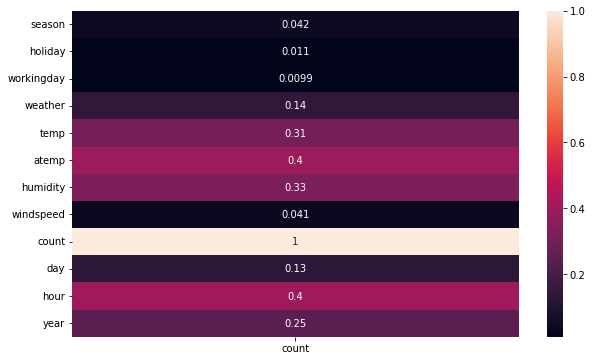

In [138]:
plt.figure(figsize=(10,6))
sns.heatmap(np.abs(train_data_all.corr()[['count']]), annot=True)
plt.show()